In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/cs challenge/cs challenge/NSL-KDD-Dataset-master/KDDTest+.txt'

In [ ]:
# Load the data from the text file
data = pd.read_csv(path, header=None)

In [ ]:
# Check the first few rows of the data
print(data.head())

   0     1         2     3      4   5   6   7   8   9   ...    33    34    35  \
0   0   tcp   private   REJ      0   0   0   0   0   0  ...  0.04  0.06  0.00   
1   0   tcp   private   REJ      0   0   0   0   0   0  ...  0.00  0.06  0.00   
2   2   tcp  ftp_data    SF  12983   0   0   0   0   0  ...  0.61  0.04  0.61   
3   0  icmp     eco_i    SF     20   0   0   0   0   0  ...  1.00  0.00  1.00   
4   1   tcp    telnet  RSTO      0  15   0   0   0   0  ...  0.31  0.17  0.03   

     36   37   38    39    40       41  42  
0  0.00  0.0  0.0  1.00  1.00  neptune  21  
1  0.00  0.0  0.0  1.00  1.00  neptune  21  
2  0.02  0.0  0.0  0.00  0.00   normal  21  
3  0.28  0.0  0.0  0.00  0.00    saint  15  
4  0.02  0.0  0.0  0.83  0.71    mscan  11  

[5 rows x 43 columns]


In [ ]:
# Rename columns for easier reference
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack_type", "last_column"
]
data.columns = column_names

In [ ]:
# Separate features and label
#X = data.drop(columns=["label", "difficulty"])
#y = data["label"]
# Encode categorical variables
categorical_features = ["protocol_type", "service", "flag"]
for feature in categorical_features:
    data[feature] = LabelEncoder().fit_transform(data[feature])


In [ ]:
# Split into features (X) and target (y)
X = data.drop(columns=["attack_type"])  # Drop the attack type column
y = data["attack_type"]

In [ ]:
# One-hot encode target labels
y = pd.get_dummies(y).values  # Convert attack types into one-hot encoded format


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
  # Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7126 - loss: 1.3562 - val_accuracy: 0.9457 - val_loss: 0.2087
Epoch 2/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9605 - loss: 0.1545 - val_accuracy: 0.9615 - val_loss: 0.1620
Epoch 3/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9662 - loss: 0.1120 - val_accuracy: 0.9645 - val_loss: 0.1296
Epoch 4/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0923 - val_accuracy: 0.9673 - val_loss: 0.1221
Epoch 5/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0735 - val_accuracy: 0.9642 - val_loss: 0.1188
Epoch 6/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0687 - val_accuracy: 0.9714 - val_loss: 0.1161
Epoch 7/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0655 - val_accuracy: 0.9701 - val_loss: 0.1151
Epoch 8/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9810 - loss: 0.0550 - val_accuracy: 0.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.3074
Test Accuracy: 0.97


In [ ]:
# Predict
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)  # Get the class with the highest probability



141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


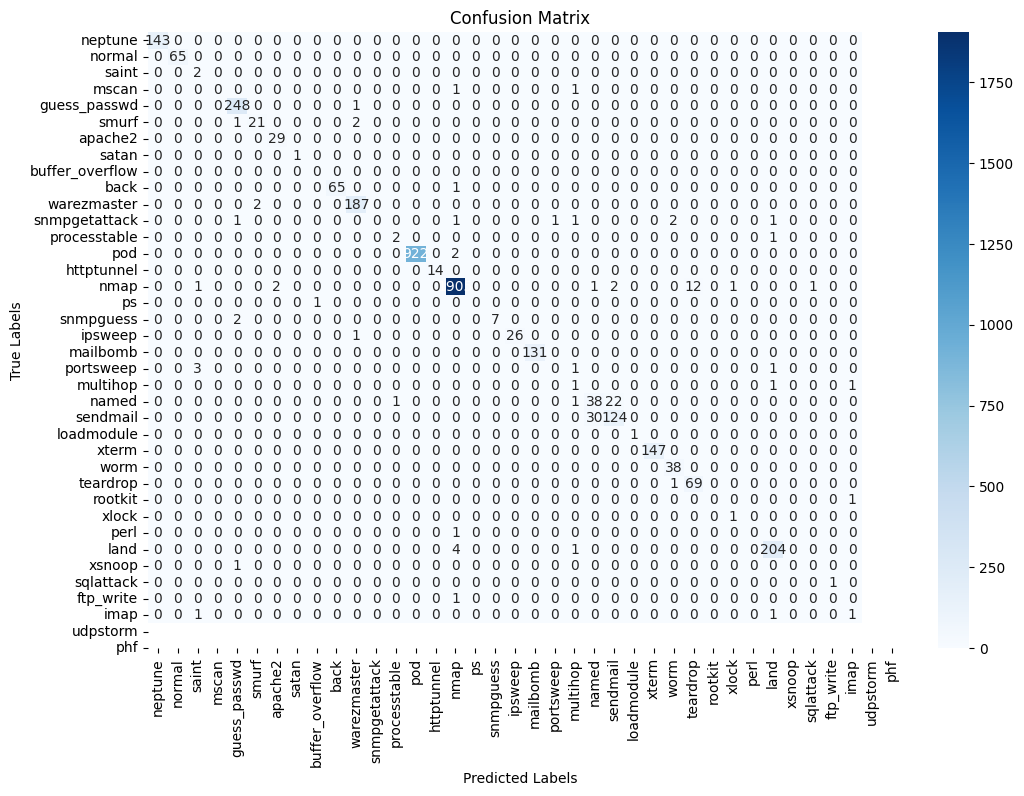

In [ ]:
# Define the class names (labels of the target variable)
class_names = data["attack_type"].unique()
# Since y_test is one-hot encoded, extract the true class labels
true_classes = y_test.argmax(axis=1)  # Convert one-hot encoded y_test to integer class labels

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

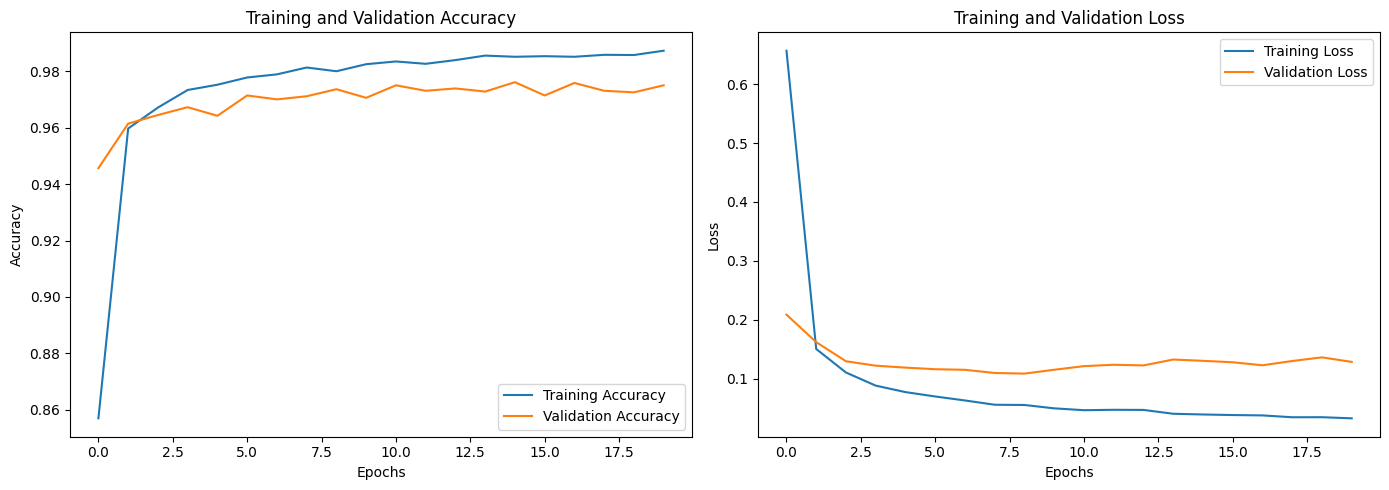

In [ ]:
# Assuming `history` is the training history returned by model.fit()
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Extract accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a DataFrame to show in a table
epochs = range(1, len(train_accuracy) + 1)
results = pd.DataFrame({
    'Epoch': epochs,
    'Training Accuracy': train_accuracy,
    'Validation Accuracy': val_accuracy,
    'Training Loss': train_loss,
    'Validation Loss': val_loss
})

# Display the table
print(results)


    Epoch  Training Accuracy  Validation Accuracy  Training Loss  \
0       1           0.856945             0.945661       0.656642   
1       2           0.959731             0.961464       0.150374   
2       3           0.967147             0.964513       0.110510   
3       4           0.973385             0.967286       0.088226   
4       5           0.975256             0.964236       0.077256   
5       6           0.977821             0.971444       0.069810   
6       7           0.978930             0.970058       0.063050   
7       8           0.981356             0.971167       0.055800   
8       9           0.980039             0.973662       0.055380   
9      10           0.982534             0.970613       0.049685   
10     11           0.983504             0.975049       0.046528   
11     12           0.982673             0.973108       0.047218   
12     13           0.983989             0.973940       0.047007   
13     14           0.985584             0.97283

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')
print("Model saved successfully!")
model.save('model.h5')
print("Model saved successfully!")

Model saved successfully!
Model saved successfully!
